In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [320]:
data = pd.read_csv("C:\\Users\\venka\\Documents\\TPO\\WineQT.csv")

In [321]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [322]:
data.shape

(1143, 13)

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [324]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [325]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [326]:
data.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
Id                      0.069708
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

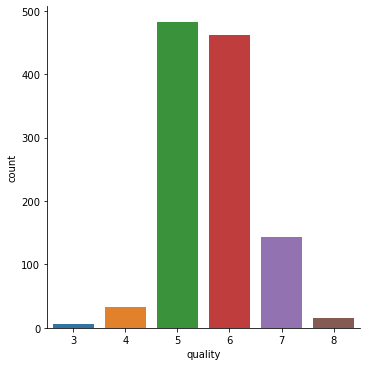

In [327]:
sns.catplot(x='quality',kind='count',data=data,height=5)

In [328]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [329]:
new_data,y = smote.fit_resample(data.drop('quality',axis=1),data['quality'])

In [330]:
new_data['quality'] = y

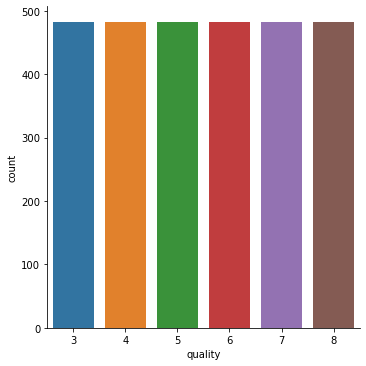

In [331]:
sns.catplot(x='quality',kind='count',data=x,height=5)

In [332]:
from scipy.stats import skew

fixed acidity
1.0435581570203705


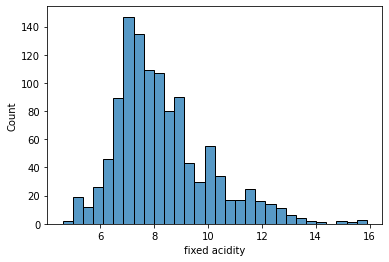

volatile acidity
0.6806526689497612


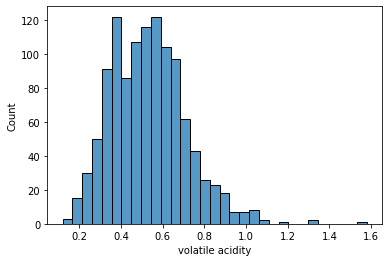

citric acid
0.3710729929318701


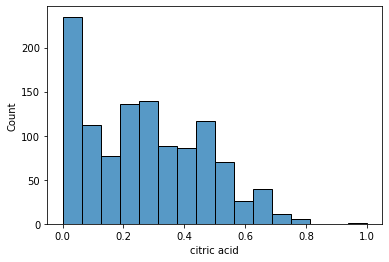

residual sugar
4.355371093085976


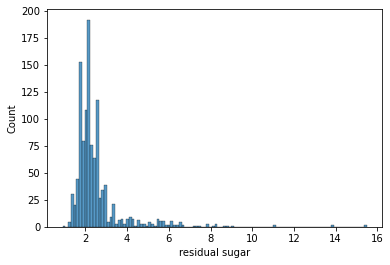

chlorides
6.018448660519524


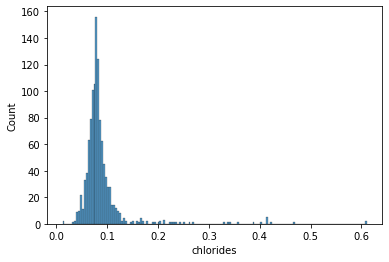

free sulfur dioxide
1.229644739026475


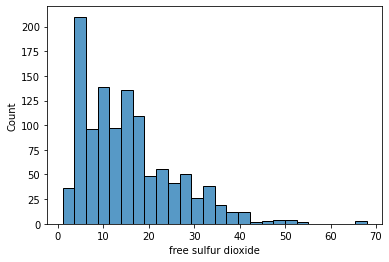

total sulfur dioxide
1.6635791721121174


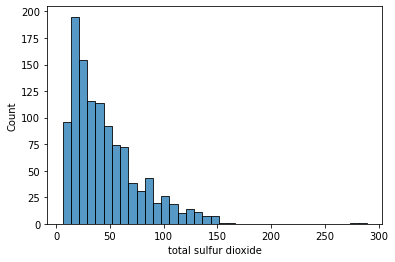

density
0.10226068292206784


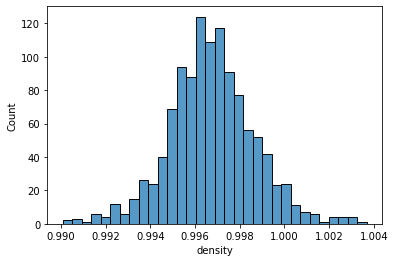

pH
0.22084807837665207


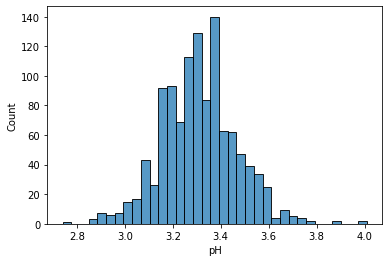

sulphates
2.4939876038821924


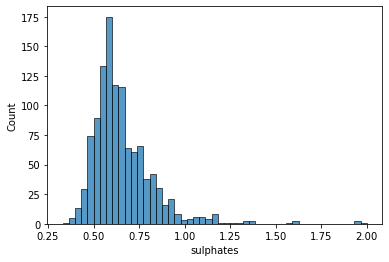

alcohol
0.8621798614666255


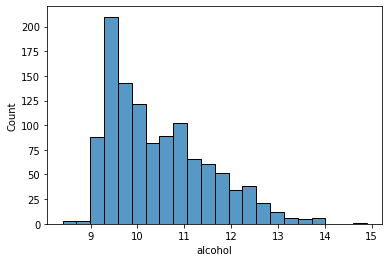

quality
0.2864151961088048


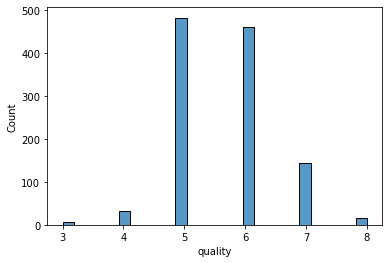

Id
-0.010405535902206199


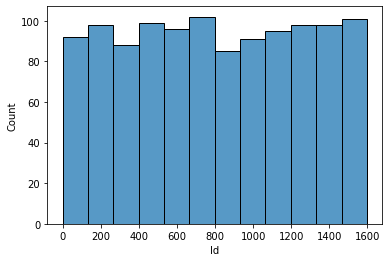

In [333]:
for col in data:
    print(col)
    print(skew(data[col]))
    
    plt.figure()
    sns.histplot(data[col])
    plt.show()

In [334]:
data['residual sugar'] = np.sqrt(data['residual sugar'])

In [335]:
data['chlorides'] = np.sqrt(data['chlorides'])

In [336]:
print(skew(data['residual sugar']))
print(skew(data['chlorides']))

2.805556809979285
3.8409371802060983


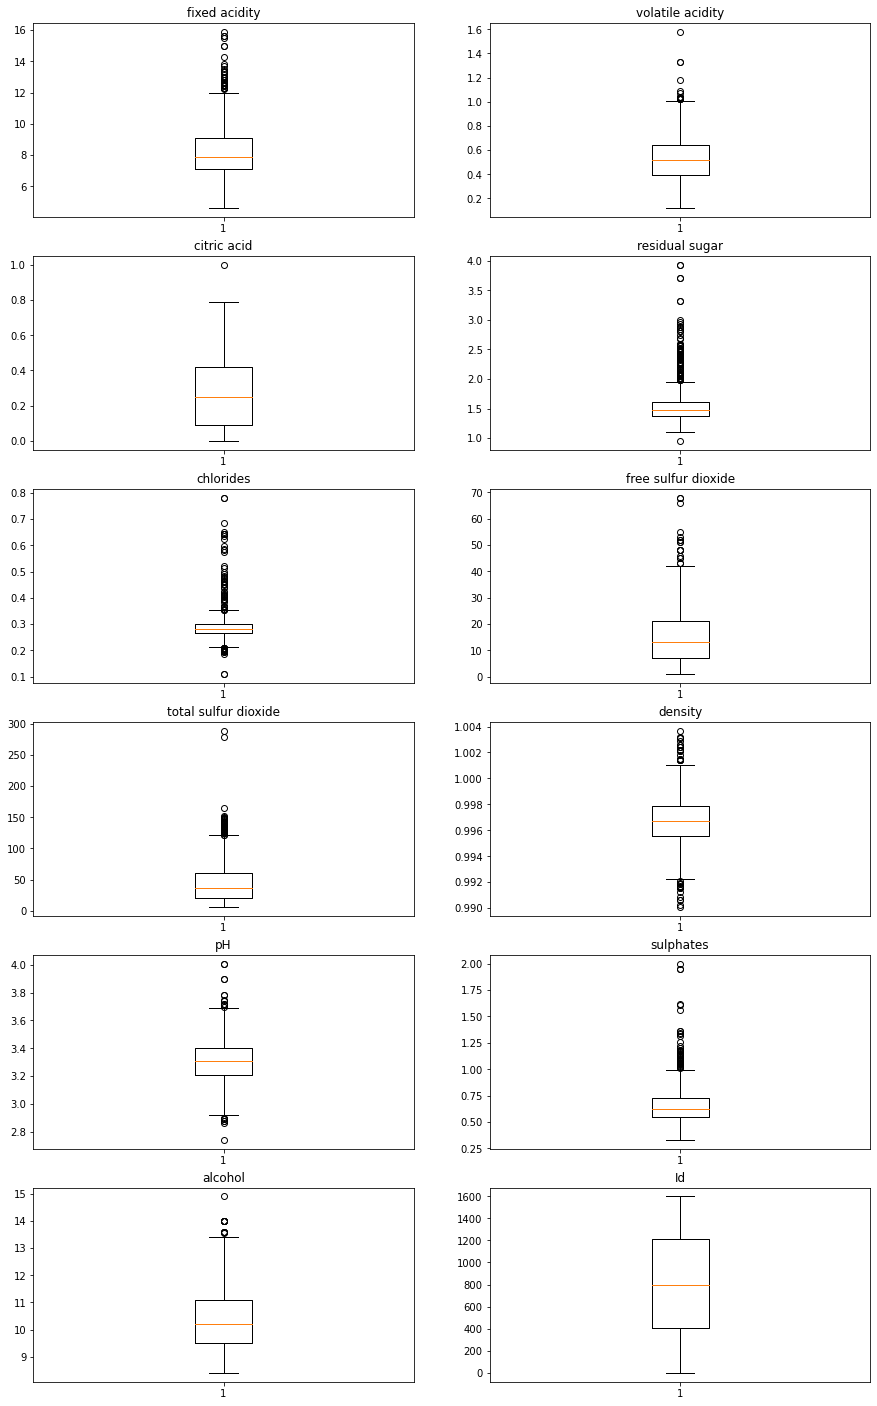

In [337]:
plt.figure(figsize = (15,25))
count = 1
for col in data.drop('quality',axis=1).columns:
    plt.subplot(6,2,count)
    plt.boxplot(data[col])
    plt.title(col)
    count += 1
plt.show()

<AxesSubplot:>

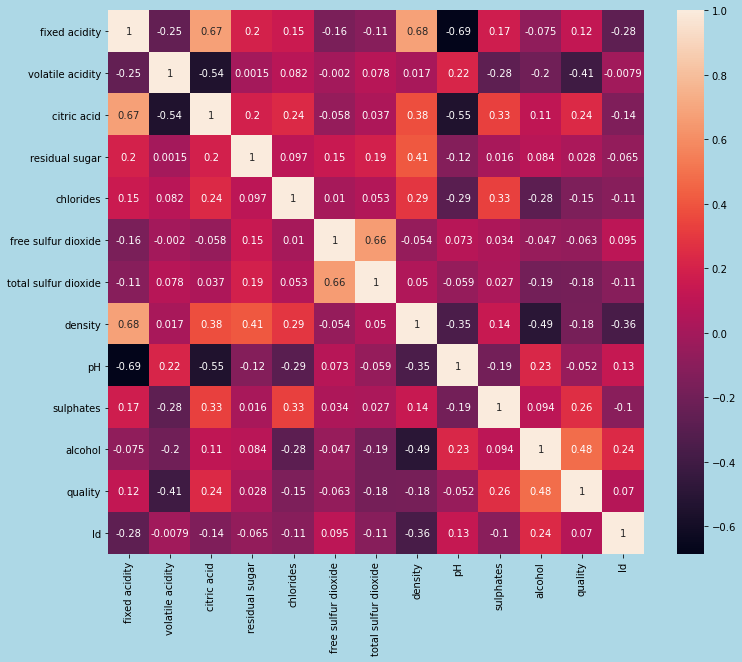

In [338]:
fig, ax = plt.subplots(figsize=[12,10],facecolor='lightblue')
corr = data.corr()
sns.heatmap(corr, ax=ax, annot=True)

In [339]:
xtrain, xtest, ytrain, ytest = train_test_split(new_data.drop('quality',axis=1),new_data['quality'], test_size=0.3, random_state=0)

In [340]:
sc_x = MinMaxScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)

In [341]:
linear = LinearRegression()
svr = svm.SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [342]:
linear.fit(xtrain,ytrain)

LinearRegression()

In [343]:
svr.fit(xtrain,ytrain)

SVR()

In [344]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [345]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [346]:
y_pred_linear = linear.predict(xtest)
y_pred_svr = svr.predict(xtest)
y_pred_dt = dt.predict(xtest)
y_pred_rf = rf.predict(xtest)

In [347]:
error_linear = mean_squared_error((y_pred_linear),ytest)
error_svr = mean_squared_error((y_pred_svr),ytest)
error_dt = mean_squared_error(y_pred_dt,ytest)
error_rf = mean_squared_error((y_pred_rf),ytest)

In [348]:
from math import sqrt
print("    MODEL        :       MSE error               RMSE\n")
print("LinearRegression : ",error_linear,"  ",sqrt(error_linear))
print("support Vector   : ",error_svr,"  ",sqrt(error_svr))
print("Decision Tree    : ",error_dt,"  ",sqrt(error_dt))
print("Random Forest    : ",error_rf,"  ",sqrt(error_rf))

    MODEL        :       MSE error               RMSE

LinearRegression :  0.8892494739225656    0.9430002512844657
support Vector   :  0.45330278976351335    0.6732776468616148
Decision Tree    :  1.0091954022988505    1.0045871800390698
Random Forest    :  0.45130528735632186    0.6717925925137325


In [349]:
print('Linear Regression          : ',r2_score(ytest,y_pred_linear))
print('Support Vector Regression  : ',r2_score(ytest,y_pred_svr))
print('Decision Tree Regressor    : ',r2_score(ytest,y_pred_dt))
print('Random Forest Regressor    : ',r2_score(ytest,y_pred_rf))

Linear Regression          :  0.6890175837057373
Support Vector Regression  :  0.8414739608990053
Decision Tree Regressor    :  0.6470708907641299
Random Forest Regressor    :  0.8421725141659551
